In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from p5lib import *

%matplotlib inline

In [2]:
data = pd.read_csv('MERGED2013_PP.csv')
print "Number of features: {}".format(len(data.columns))
print "Number of rows: {}".format(len(data))

Number of features: 1729
Number of rows: 7804


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = preprocess_data(data)
print "Num data after preprocessing: {}".format(len(data))
print "Num features: {}".format(len(data.columns))
# print data.shape


Num data after preprocessing: 6007
Num features: 45


In [4]:
selected_features = ['CONTROL', 'DEBT_MDN', 'DEP_INC_AVG', 'GRAD_DEBT_MDN', 'IND_INC_AVG', 'INEXPFTE', 'PAR_ED_PCT_1STGEN', 
          'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCTFLOAN', 'PCTPELL', 'UG25abv', 'UGDS', 
          'WDRAW_DEBT_MDN', 'L4_COLLEGE', 'NPT4', 'NUM4', 
          'PFTFTUG1_EF', 'PFTFAC',
          'SAT_AVG_ALL', 'ACTCMMID', 'ADM_RATE_ALL', 'AVGFACSAL', 'COSTT4_A',
          'C150', 'RET_FT']
reduced_data = data[selected_features].dropna()

X = reduced_data.copy()
y = X[['C150', 'RET_FT']]
X = X.drop('C150', 1)
X = X.drop('RET_FT', 1)
print X.shape
print y.shape

# print X.PFTFTUG1_EF.describe()

(1210, 25)
(1210, 2)


In [5]:
# print X.corr(method='pearson')

In [6]:
faculty_cols = ['AVGFACSAL', 'PFTFAC', 'ADM_RATE_ALL']
stu_score_cols = ['ACTCMMID', 'SAT_AVG_ALL']
cost_cols = ['COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'TUITFTE', 
             'INEXPFTE', 'NPT4']
grant_loan_cols = ['PCTPELL', 'PCTFLOAN']
stu_composition_cols = ['NUM4', 'UG25abv', 'PFTFTUG1_EF', 'UGDS', 'PAR_ED_PCT_1STGEN', 
                        'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 
                        'PAR_ED_PCT_PS', 'DEP_INC_AVG', 'IND_INC_AVG']
debt_cols = ['DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN']

reduced_data['L4_COLLEGE'] = reduced_data['L4_COLLEGE'].astype(int)

data_for_plotting = {
    'data': reduced_data,
    'data_L4': reduced_data[reduced_data['L4_COLLEGE'] == 1],
    'data_4': reduced_data[reduced_data['L4_COLLEGE'] == 0],
    'data_control1': reduced_data[reduced_data.CONTROL == 1], # public
    'data_control2': reduced_data[reduced_data.CONTROL == 2], # private non-profit
    'data_control3': reduced_data[reduced_data.CONTROL == 3]  # private profit
}

# 'DEBT_MDN', 'PFTFAC', 'ACTCMMID', 'SAT_AVG_ALL', 'COSTT4_A', 'INEXPFTE', 'PCTPELL', 'PAR_ED_PCT_1STGEN', 
# 'PAR_ED_PCT_PS', 'DEP_INC_AVG', 

In [11]:
# plot_feature_vs_completion(debt_cols, data_for_plotting)

In [5]:
from sklearn import preprocessing

tmpX = X[['DEBT_MDN', 'DEP_INC_AVG', 'GRAD_DEBT_MDN', 'IND_INC_AVG', 'INEXPFTE', 'UGDS', 'WDRAW_DEBT_MDN', 'NPT4', 
          'NUM4', 'SAT_AVG_ALL', 'ACTCMMID', 'AVGFACSAL', 'COSTT4_A',
          'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCTFLOAN', 'PCTPELL', 'UG25abv', 
          'PFTFTUG1_EF', 'PFTFAC', 'ADM_RATE_ALL'
         ]]

scaler = preprocessing.StandardScaler()
forPcaX = scaler.fit_transform(tmpX)
print forPcaX.shape

(1210, 23)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=forPcaX.shape[1])
pca.fit(forPcaX)
print pca.explained_variance_ratio_

[  3.61448338e-01   1.60225813e-01   9.03945924e-02   7.37503475e-02
   6.59417566e-02   4.55909843e-02   3.48239856e-02   2.68635652e-02
   2.29647586e-02   1.98769269e-02   1.93667645e-02   1.59849191e-02
   1.40968240e-02   1.16973258e-02   9.89668434e-03   9.22112533e-03
   6.36891416e-03   4.01930561e-03   3.41721299e-03   2.80217633e-03
   1.24767981e-03   8.25017351e-19   2.22500832e-19]


In [7]:
pca = PCA(n_components=12)
pca.fit(forPcaX)
reducedX = pca.transform(forPcaX)
print reducedX.shape

(1210, 12)


In [8]:
# add the categorical feature

tmp1X = np.array(pd.get_dummies(X['CONTROL']))
tmp2X = X['L4_COLLEGE'].astype(int)
tmp2X = np.reshape(tmp2X, (len(tmp2X), 1)) 
print tmp1X.shape
print tmp2X.shape
print reducedX.shape
finalX = np.concatenate((reducedX, tmp1X, tmp2X), axis=1)
print finalX.shape

(1210, 3)
(1210, 1)
(1210, 12)
(1210, 16)


In [9]:
from sklearn import metrics
from sklearn import cross_validation as cv
from sklearn.tree import DecisionTreeRegressor

y = np.array(y)
X_train, X_test, y_train, y_test = cv.train_test_split(finalX, y, train_size=0.8)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(968, 16)
(242, 16)
(968, 2)
(242, 2)


--- R2 Completion ---
best params: {'epsilon': 0.10000000000000001, 'C': 10.0, 'gamma': 0.10000000000000001}
R2 score on train data: 0.846869676382
R2 score on test  data: 0.727118382761
--- R2 Retention ---
best params: {'epsilon': 0.10000000000000001, 'C': 0.10000000000000001, 'gamma': 0.10000000000000001}
R2 score on train data: 0.647047444127
R2 score on test  data: 0.59109308423
--- MSE Completion ---
MSE on train data: 0.0042225222819
MSE on test  data: 0.00740640859897
--- MSE Retention ---
MSE on train data: 0.00454543511711
MSE on test  data: 0.0051609058231
--- MAE Completion ---
MAE on train data: 0.0552822432893
MAE on test  data: 0.065083754705
--- MAE Retention ---
MAE on train data: 0.0529544574123
MAE on test  data: 0.0564402214313


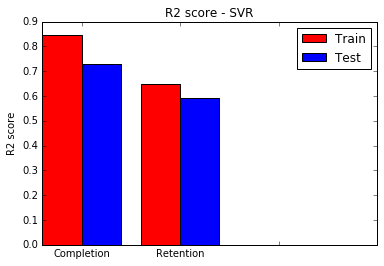

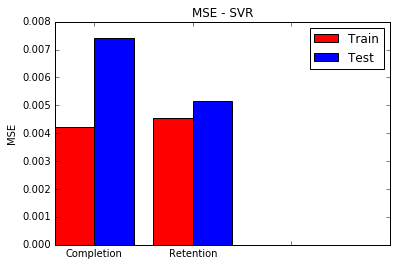

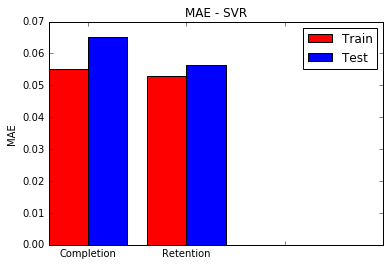

In [11]:
SVR_model = build_SVR_model(X_train, X_test, y_train, y_test, cv=3)

--- R2 Completion ---
best params: {'n_neighbors': 10}
R2 score on train data: 0.809071402774
R2 score on test  data: 0.763800013297
--- R2 Retention ---
best params: {'n_neighbors': 9}
R2 score on train data: 0.71393975318
R2 score on test  data: 0.700221265094
--- MSE Completion ---
MSE on train data: 0.0052647982254
MSE on test  data: 0.00641081517435
--- MSE Retention ---
MSE on train data: 0.00368397471521
MSE on test  data: 0.00378357459596
--- MAE Completion ---
MAE on train data: 0.055132905991
MAE on test  data: 0.0617437520597
--- MAE Retention ---
MAE on train data: 0.0414896349862
MAE on test  data: 0.0446914141414


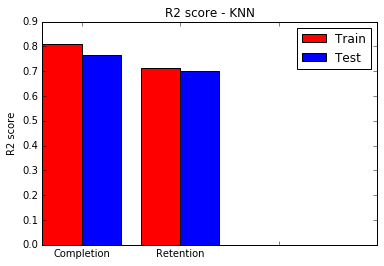

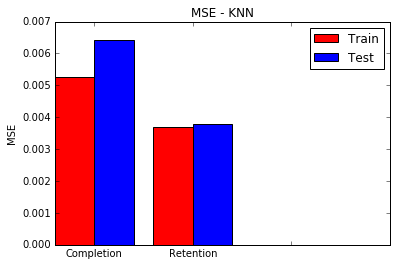

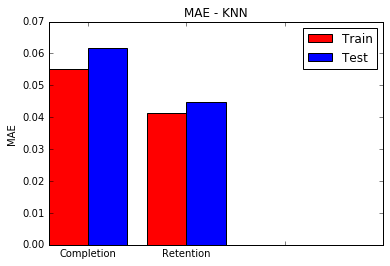

In [12]:
KNN_model = build_KNN_model(X_train, X_test, y_train, y_test)

In [14]:
X_all = data[selected_features].copy()

fill_cols_with_mean = ['DEBT_MDN', 'DEP_INC_AVG', 'GRAD_DEBT_MDN', 'IND_INC_AVG', 'INEXPFTE', 'WDRAW_DEBT_MDN',
                       'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCTFLOAN', 'PCTPELL', 
                       'UG25abv', 'NPT4', 'NUM4', 'PFTFTUG1_EF', 'PFTFAC', 'SAT_AVG_ALL', 'ACTCMMID', 'ADM_RATE_ALL', 
                       'AVGFACSAL', 'COSTT4_A']

for col in fill_cols_with_mean:
    if col in X:
        X_all[col] = X_all[col].fillna(X_all[col].mean())

print X_all.shape
print len(X_all.dropna()) # check there is no missing values

(6007, 27)
6007


In [15]:
y1_all = X_all.C150
y2_all = X_all.RET_FT
y_all = X_all[['C150', 'RET_FT']].as_matrix()
print y_all.shape
X_all = X_all.drop('C150', 1)
X_all = X_all.drop('RET_FT', 1)

print X_all.shape
print y1_all.shape
print y2_all.shape

(6007, 2)
(6007, 25)
(6007,)
(6007,)


In [16]:
tmpX = X_all[['DEBT_MDN', 'DEP_INC_AVG', 'GRAD_DEBT_MDN', 'IND_INC_AVG', 'INEXPFTE', 'UGDS', 'WDRAW_DEBT_MDN', 'NPT4', 
          'NUM4', 'SAT_AVG_ALL', 'ACTCMMID', 'AVGFACSAL', 'COSTT4_A',
          'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCTFLOAN', 'PCTPELL', 'UG25abv', 
          'PFTFTUG1_EF', 'PFTFAC', 'ADM_RATE_ALL'
         ]]

# use the scaler & pca that was used to train the model
forPcaX = scaler.transform(tmpX)
print forPcaX.shape
reducedX = pca.transform(forPcaX)
print reducedX.shape


(6007, 23)
(6007, 12)


In [17]:

tmp1X = np.array(pd.get_dummies(X_all['CONTROL']))
tmp2X = X_all['L4_COLLEGE'].astype(int)
tmp2X = np.reshape(tmp2X, (len(tmp2X), 1)) 
print tmp1X.shape
print tmp2X.shape
print reducedX.shape
finalX = np.concatenate((reducedX, tmp1X, tmp2X), axis=1)
print finalX.shape

print_r2score(SVR_model['reg1'], finalX, y1_all)
print_mae(SVR_model['reg1'], finalX, y1_all)
print_mse(SVR_model['reg1'], finalX, y1_all)

print_r2score(SVR_model['reg2'], finalX, y2_all)
print_mae(SVR_model['reg2'], finalX, y2_all)
print_mse(SVR_model['reg2'], finalX, y2_all)

(6007, 3)
(6007, 1)
(6007, 12)
(6007, 16)
R2 score on train data: 0.126002501628
MAE on train data: 0.180327650579
MSE on train data: 0.0493104962464
R2 score on train data: 0.0700266542575
MAE on train data: 0.127675149942
MSE on train data: 0.0296799853651


0.029679985365067878

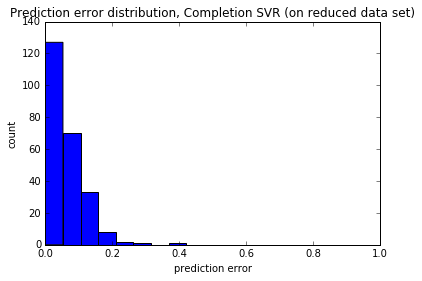

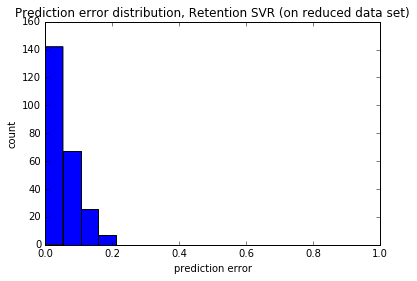

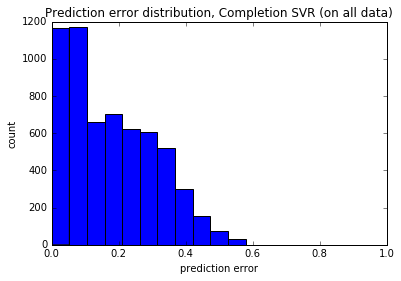

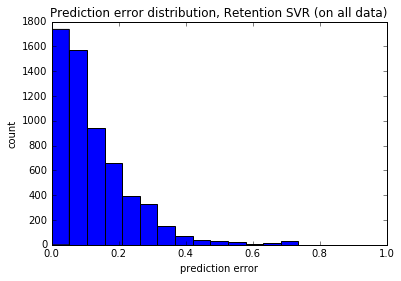

In [19]:
# print [y_test.shape, y_all.shape]
# print [X_test.shape, X_all.shape]

hist_plot_delta(SVR_model, X_test, y_test, 'SVR (on reduced data set)')
hist_plot_delta(SVR_model, finalX, y_all, 'SVR (on all data)')